<a href="https://colab.research.google.com/github/SUPREME-CODER/NNFL-IA-1/blob/master/Modeling_%26_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import graphs
from metrics import binary_classification_summary, confusion_matrix_dataframe
from metrics import specificity

%matplotlib inline
np.random.seed(42)

In [0]:
pulsar = pd.read_csv("/content/drive/My Drive/NNFL IA - 1 Data/pulsar_cleaned.csv")

In [12]:
pulsar.head()

,mean_ip,sd_ip,ex_kurt_ip,skew_ip,mean_dmsnr,sd_dmsnr,ex_kurt_dmsnr,skew_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [13]:
print(f"The shape of the dataset is: {pulsar.shape}")

The shape of the dataset is: (17898, 9)


In [14]:
pulsar.dtypes.value_counts()

float64    8
int64      1
dtype: int64

In [15]:
pulsar.isnull().sum()

mean_ip          0
sd_ip            0
ex_kurt_ip       0
skew_ip          0
mean_dmsnr       0
sd_dmsnr         0
ex_kurt_dmsnr    0
skew_dmsnr       0
target_class     0
dtype: int64

In [16]:
#Establishing the baseline accuracy to know the lower limit of the accuracy we need to achieve.
round(pulsar["target_class"].value_counts(normalize = True)*100, 2)

0    90.84
1     9.16
Name: target_class, dtype: float64

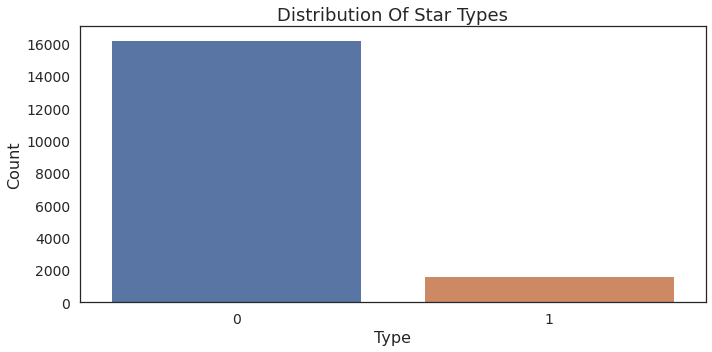

In [17]:
graphs.countplots(df = pulsar, columns = ["target_class"], titles  = ["Distribution Of Star Types"], ylabel  = "Count", labels  = ["Type"], dim = (10,5), row = 1,col = 1)

In [0]:
# Feature Engineering

# Squaring the `mean_ip` column

pulsar["mean_ip_squared"] = pulsar["mean_ip"].apply(lambda x: x**2)

# Squaring the `sd_ip` column

pulsar["sd_ip_squared"]   = pulsar["sd_ip"].apply(lambda x: x**2)

In [19]:
# Making sure new columns were added

pulsar.columns

Index(['mean_ip', 'sd_ip', 'ex_kurt_ip', 'skew_ip', 'mean_dmsnr', 'sd_dmsnr',
       'ex_kurt_dmsnr', 'skew_dmsnr', 'target_class', 'mean_ip_squared',
       'sd_ip_squared'],
      dtype='object')

In [0]:
X = pulsar.drop("target_class", axis = 1)
y = pulsar["target_class"]

In [0]:
# Scaling the data

ss = StandardScaler()
X_ss    = ss.fit_transform(X)

In [0]:
# TRain Test Split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, random_state = 42, stratify = y)


In [26]:
# Model Creation
input_shape = X_train.shape[1]
of_model = Sequential()
of_model.add(Dense(6, input_dim = input_shape, activation = "relu", kernel_regularizer = regularizers.l2(0.001)))
of_model.add(Dense(1, activation = "sigmoid", kernel_regularizer = regularizers.l2(0.001)))
of_model.compile(loss      = "binary_crossentropy", optimizer = "adam", metrics   = ["acc"])
of_model.fit(X_train, y_train, epochs = 150, batch_size = 100, verbose = 0)


In [27]:
of_train_preds = of_model.predict_classes(X_train, batch_size = 100, verbose = 0).ravel()
of_test_preds  = of_model.predict_classes(X_test, batch_size = 100, verbose = 0).ravel()
binary_classification_summary(y_train, of_train_preds)

,Scores
Accuracy,0.979736
Sensitivity,0.837266
Specificity,0.994095
Matthews Corr. Coef.,0.873785
AUROC,0.915681


In [28]:
binary_classification_summary(y_test, of_test_preds)

,Scores
Accuracy,0.979888
Sensitivity,0.839024
Specificity,0.994096
Matthews Corr. Coef.,0.874870
AUROC,0.916560


In [29]:
y_test.value_counts()

0    4065
1     410
Name: target_class, dtype: int64

In [30]:
confusion_matrix_dataframe(y_test, of_test_preds, columns = ["Predicted Non-Pulsar", "Predicted Pulsar"], index   = ["Actual Non-Pulsar", "Actual Pulsar"])

,Predicted Non-Pulsar,Predicted Pulsar
Actual Non-Pulsar,4041,24
Actual Pulsar,66,344


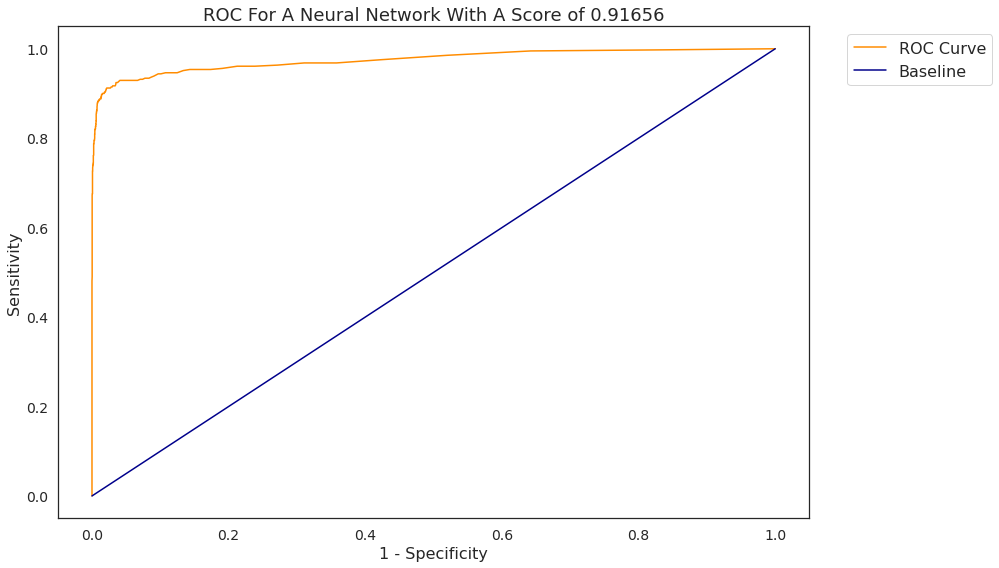

In [31]:
graphs.roc_curve(model_prob  = of_model,
                 X_test = X_test,
                 y_test  = y_test,
                 y_predicted = of_test_preds,
                 title = "ROC For A Neural Network",
                 dim = (14,8))

In [0]:
# Very good results were observed across the board, but our best model is the model with the interaction features because
# it has both the best metric scores and the highest ROC-AUC score.

# The ROC curve is a representation of the relationship between the true positives and the false positives.

# The low score indicates that the model is good at predicting the two classes, which we also saw from the confusion matrices. 
# In an ideal world, we would have perfect 90º angle but ours is _extremely_ close to that which indicates our classes are significantly distinct.